# 1. **CARICAMENTO DATASET**

In [ ]:
import pandas as pd

data = pd.read_csv('/crime.csv', encoding='ISO-8859-1')

# 2. **ANALISI EDA DEI DATI**


In [ ]:
data.head()

data.describe()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizzazione delle prime righe del dataset
print("Prime righe del dataset:")
print(data.head())

# Statistiche descrittive delle variabili numeriche
print("\nStatistiche descrittive:")
print(data.describe())

# Informazioni generali sul dataset
print("\nInformazioni sul dataset:")
print(data.info())

# Conteggio dei valori per categorie di crimine e per distretto
print("\nCrimini per Categoria:")
print(data['OFFENSE_CODE_GROUP'].value_counts())
print("\nCrimini per Distretto:")
print(data['DISTRICT'].value_counts())

# Analisi dei valori mancanti
missing_data = data.isnull().sum() / len(data) * 100
print("\nPercentuale di valori mancanti per colonna:")
print(missing_data)



Prime righe del dataset:
  INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long 

visualizzazione delle prime distribuzioni

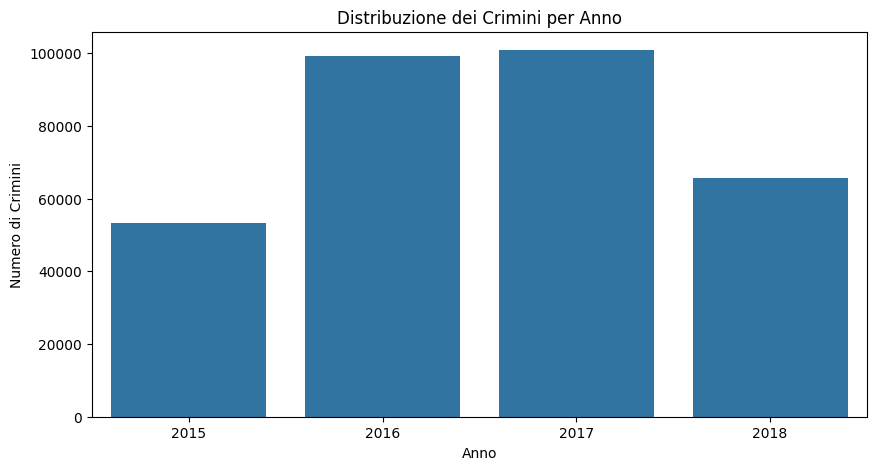

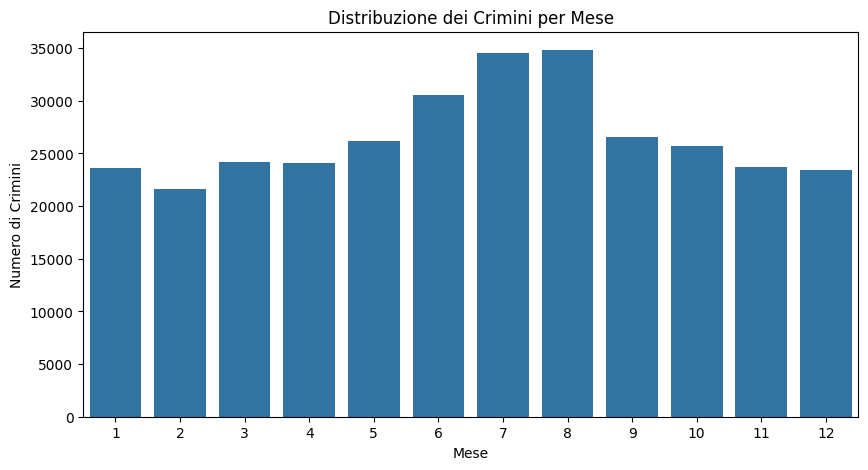

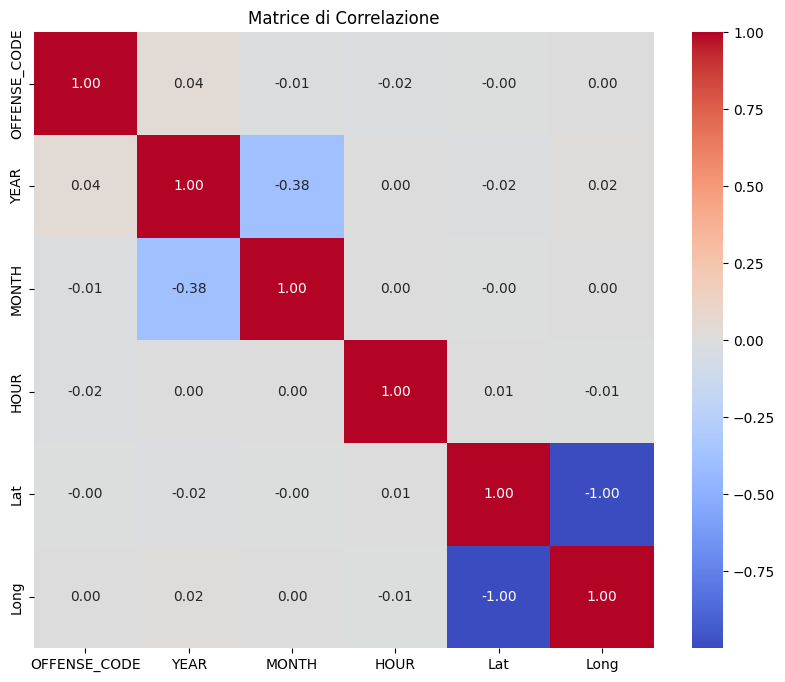

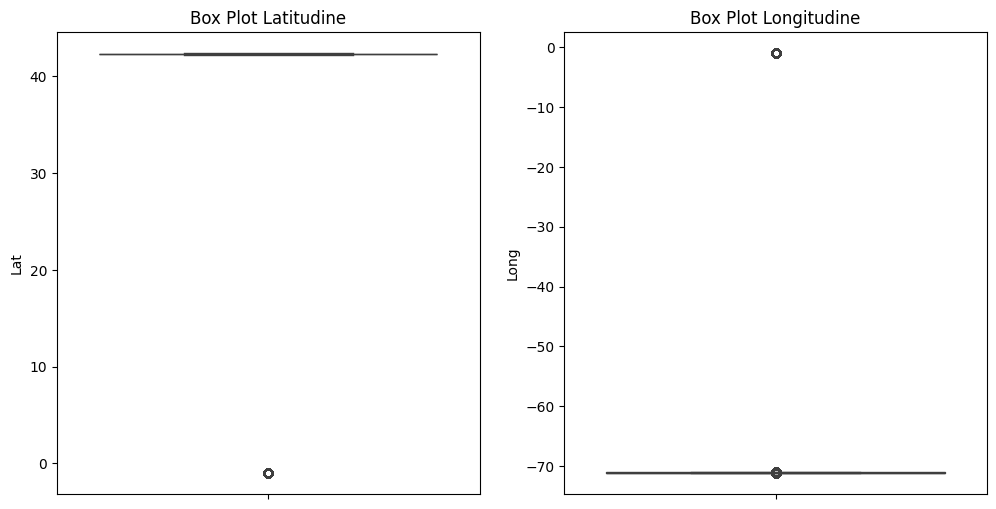

<ipython-input-4-bd7e3d2f50af>:43: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['HOUR'].dropna(), shade=True)  # Assicurati che non ci siano NaN


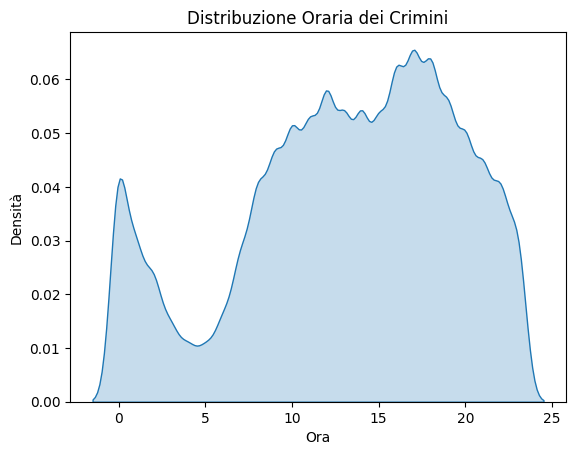

In [ ]:
# Distribuzione dei crimini per anno
plt.figure(figsize=(10, 5))
sns.countplot(x='YEAR', data=data)
plt.title('Distribuzione dei Crimini per Anno')
plt.ylabel('Numero di Crimini')
plt.xlabel('Anno')
plt.show()

# Distribuzione dei crimini per mese
plt.figure(figsize=(10, 5))
sns.countplot(x='MONTH', data=data)
plt.title('Distribuzione dei Crimini per Mese')
plt.ylabel('Numero di Crimini')
plt.xlabel('Mese')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assicuriamoci di lavorare solo con dati numerici
numeric_data = data.select_dtypes(include=[np.number])  # Seleziona solo dati numerici
numeric_data = numeric_data.dropna()  # Rimuove eventuali NaN, alternativamente puoi usare fillna per sostituirli

# Correlazione tra variabili numeriche
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

# Box Plot per la longitudine e latitudine
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Lat'])
plt.title('Box Plot Latitudine')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Long'])
plt.title('Box Plot Longitudine')
plt.show()

# Grafico di densità per l'ora del crimine
sns.kdeplot(data['HOUR'].dropna(), shade=True)  # Assicurati che non ci siano NaN
plt.title('Distribuzione Oraria dei Crimini')
plt.xlabel('Ora')
plt.ylabel('Densità')
plt.show()

# 3. **ANALISI GEOGRAFICA**


**A. Distribuzione dei crimini per distretto: visualizzare il numero di crimini per distretto per identificare aree con maggiore o minore attività criminale**

<ipython-input-5-c8f317e6cb43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DISTRICT', data=data, order=data['DISTRICT'].value_counts().index, palette='viridis')


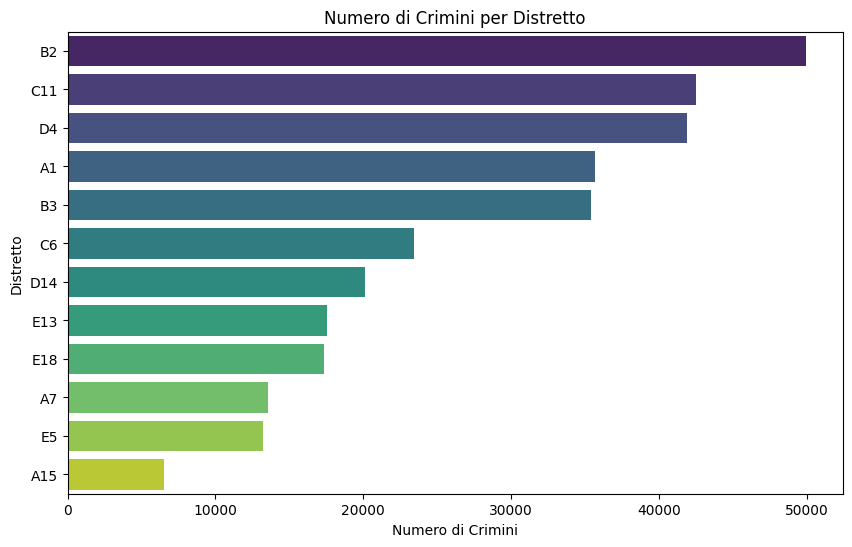

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizzazione del numero di crimini per distretto
plt.figure(figsize=(10, 6))
sns.countplot(y='DISTRICT', data=data, order=data['DISTRICT'].value_counts().index, palette='viridis')
plt.title('Numero di Crimini per Distretto')
plt.xlabel('Numero di Crimini')
plt.ylabel('Distretto')
plt.show()

**B. Mappe di calore: Utilizzare le coordinate geografiche per creare una mappa di calore interattiva che mostri la concentrazione dei crimini. Potremmo usare la libreria Python folium per le mappe interattive.**

In [ ]:
import folium
from folium.plugins import HeatMap

# Pulizia dei dati per rimuovere le righe dove le coordinate sono mancanti
data_clean = data.dropna(subset=['Lat', 'Long'])
data_clean = data_clean[(data_clean['Lat'] != 0) & (data_clean['Long'] != 0)]

# Mostra il numero di dati rimossi
print("Dati originali:", len(data))
print("Dati puliti:", len(data_clean))

import os
import folium
from folium.plugins import HeatMap

# Crea una mappa base centrata sulle medie delle coordinate pulite
map_base = folium.Map(location=[data_clean['Lat'].mean(), data_clean['Long'].mean()], zoom_start=11)
# Verifica se il percorso esiste, se no, crealo
if not os.path.exists('/mnt/data'):
    os.makedirs('/mnt/data')
# Aggiungi la mappa di calore al nostro mappa base
HeatMap(data=data_clean[['Lat', 'Long']].values, radius=10).add_to(map_base)

# Salva la mappa in un file HTML
map_base.save('/mnt/data/crime_heatmap.html')

# Mostra il percorso del file salvato per confermare
print("Mappa salvata in: /mnt/data/crime_heatmap.html")

# Visualizza la mappa in Jupyter (opzionale, dipende dall'ambiente di sviluppo)
map_base


Dati originali: 319073
Dati puliti: 299074
Mappa salvata in: /mnt/data/crime_heatmap.html


**C. Correlazione geografica: Analizzare se certi tipi di crimini sono più frequenti in specifiche aree**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creazione di una tabella pivot
crime_type_district = pd.pivot_table(data, values='INCIDENT_NUMBER', index='DISTRICT', columns='OFFENSE_CODE_GROUP', aggfunc='count', fill_value=0)

# Visualizzazione della tabella pivot
print(crime_type_district.head())


OFFENSE_CODE_GROUP  Aggravated Assault  Aircraft  Arson  \
DISTRICT                                                  
A1                                 964         0      8   
A15                                130         0      5   
A7                                 334        33      5   
B2                                1644         0     18   
B3                                1131         0     12   

OFFENSE_CODE_GROUP  Assembly or Gathering Violations  Auto Theft  \
DISTRICT                                                           
A1                                               239         359   
A15                                                4         101   
A7                                                16         184   
B2                                               454         867   
B3                                                18         576   

OFFENSE_CODE_GROUP  Auto Theft Recovery  Ballistics  Biological Threat  \
DISTRICT                           

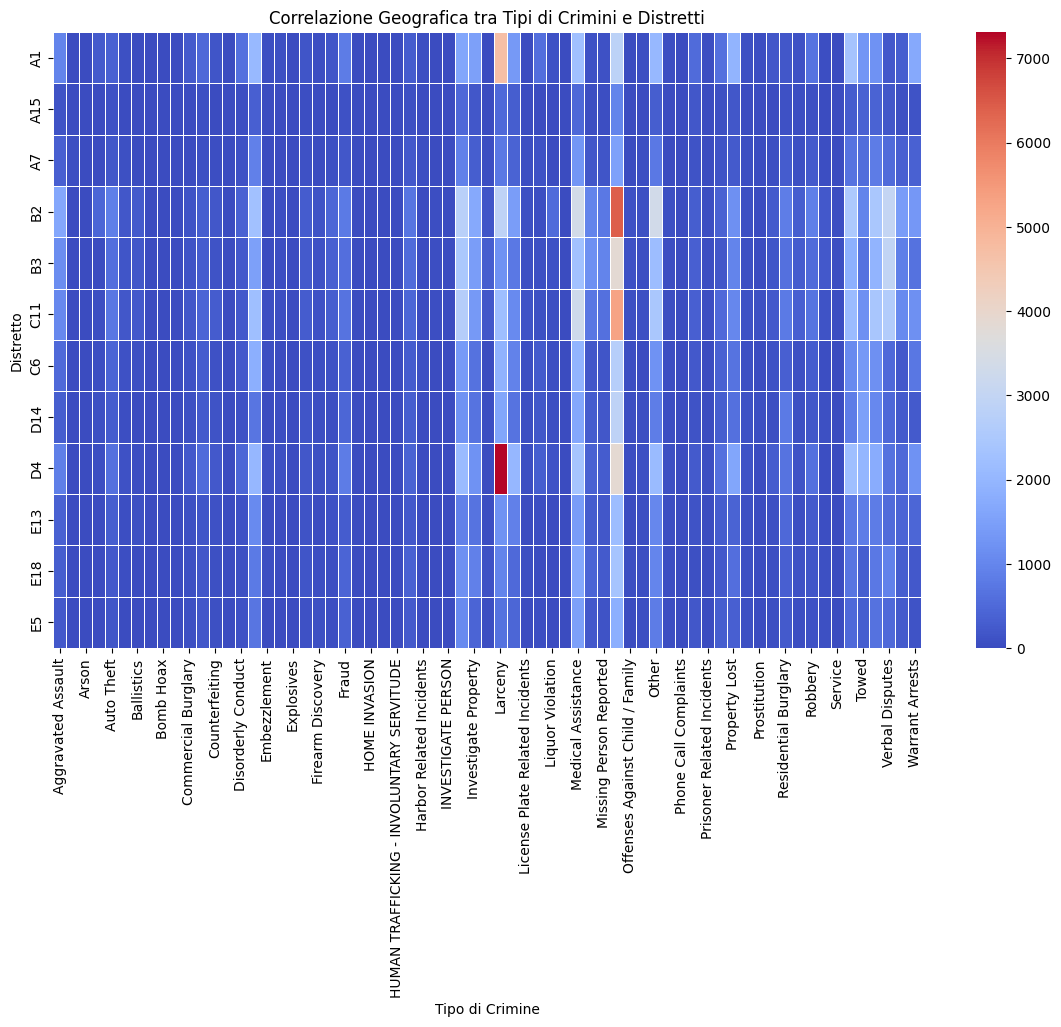

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(crime_type_district, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlazione Geografica tra Tipi di Crimini e Distretti')
plt.xlabel('Tipo di Crimine')
plt.ylabel('Distretto')
plt.show()


# **4. ANALISI TEMPORALE**


**A. Trend dei crimini nel tempo: Analizzare come la frequenza dei crimini cambia nel corso degli anni, dei mesi o nella settimana**


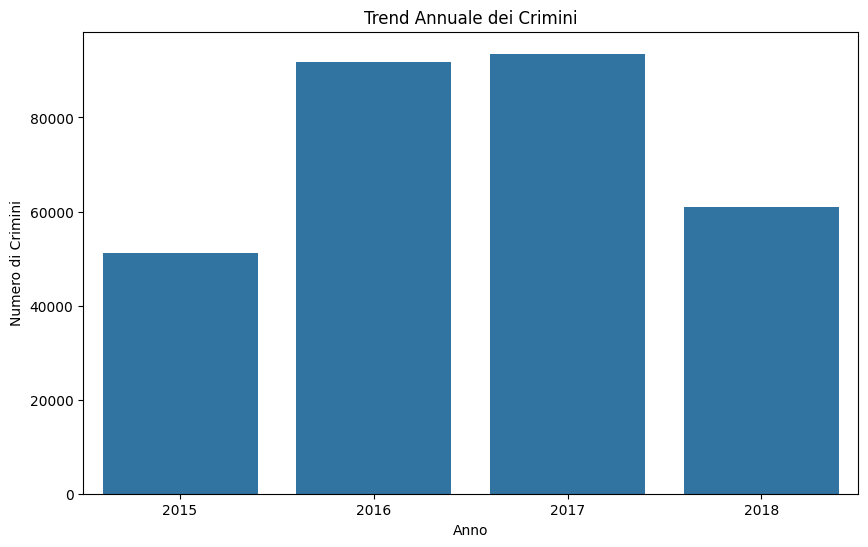

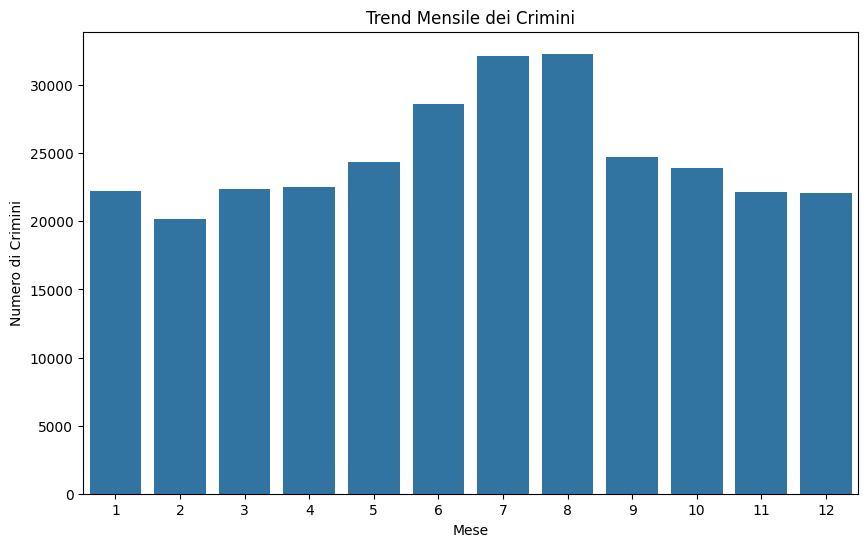

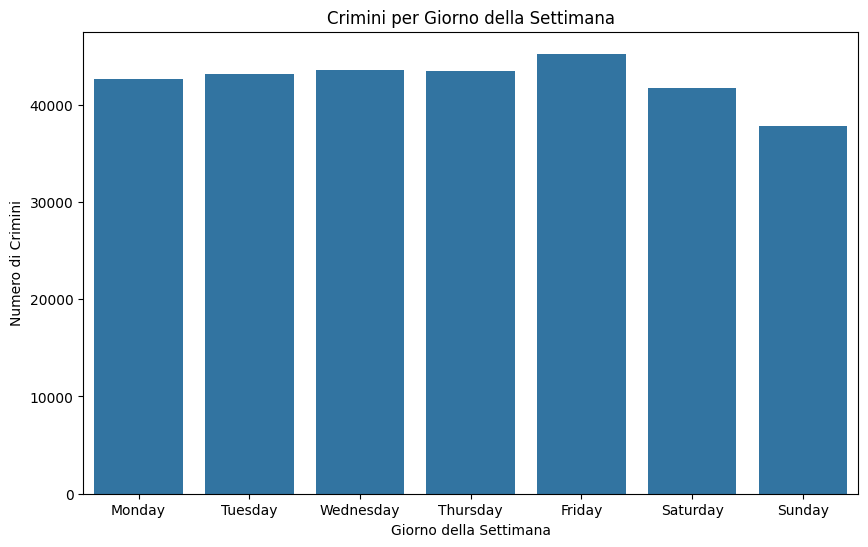

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grafico dei trend annuali
plt.figure(figsize=(10, 6))
sns.countplot(x='YEAR', data=data)
plt.title('Trend Annuale dei Crimini')
plt.xlabel('Anno')
plt.ylabel('Numero di Crimini')
plt.show()

# Grafico dei trend mensili
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=data)
plt.title('Trend Mensile dei Crimini')
plt.xlabel('Mese')
plt.ylabel('Numero di Crimini')
plt.show()

#Grafico dei trend settimanali
plt.figure(figsize=(10, 6))
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='DAY_OF_WEEK', data=data, order=order_days)
plt.title('Crimini per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Numero di Crimini')
plt.show()

**B. Orario dei crimini: Studiare a che ora del giorno i crimini sono più frequenti.**

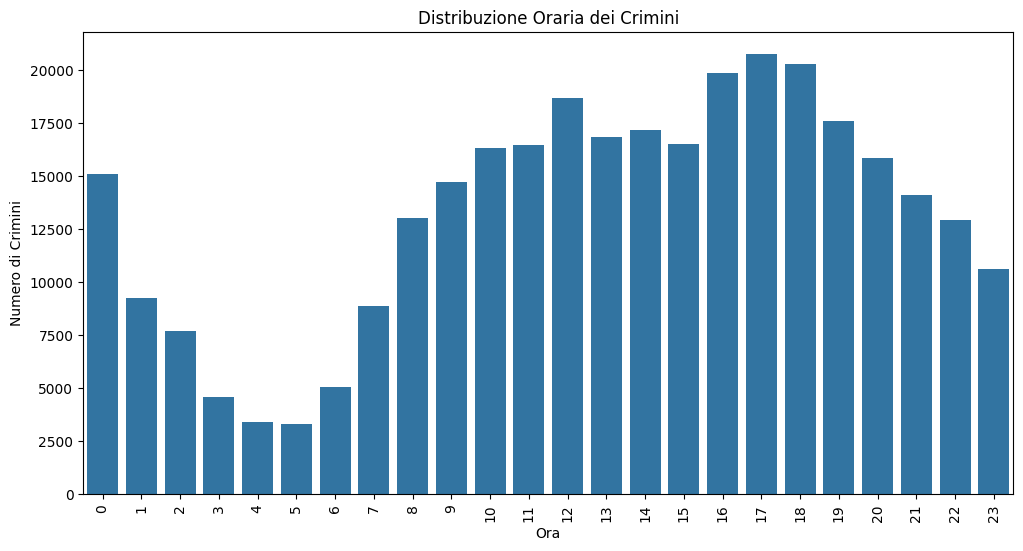

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HOUR', data=data)
plt.title('Distribuzione Oraria dei Crimini')
plt.xlabel('Ora')
plt.ylabel('Numero di Crimini')
plt.xticks(rotation=90)  # Ruota le etichette per una migliore leggibilità
plt.show()

**C. Mappa interattiva per l'analisi del tempo**

In [ ]:
# Filtriamo per colonne rilevanti e rimuoviamo i dati mancanti
data_time_geo = data.dropna(subset=['Lat', 'Long', 'OCCURRED_ON_DATE'])
data_time_geo = data_time_geo[(data_time_geo['Lat'] != 0) & (data_time_geo['Long'] != 0)]

# Conversione della data in formato datetime
data_time_geo['OCCURRED_ON_DATE'] = pd.to_datetime(data_time_geo['OCCURRED_ON_DATE'])

# Creazione di una lista di dati raggruppati per data/ora
data_grouped = data_time_geo.groupby(data_time_geo['OCCURRED_ON_DATE'].dt.date).agg(list)[['Lat', 'Long']]

location_date_list = [
    [[row.Lat, row.Long] for row in data_time_geo[data_time_geo['OCCURRED_ON_DATE'].dt.date == date].itertuples()]
    for date in data_grouped.index
]

# Continuiamo a utilizzare 'data_time_geo' che è già filtrato e con la colonna 'OCCURRED_ON_DATE' convertita in datetime
# Creiamo la lista di gruppi di dati per ciascuna data
location_date_list = []
dates = list(data_grouped.index)
for date in dates:
    day_data = [[row.Lat, row.Long] for row in data_time_geo[data_time_geo['OCCURRED_ON_DATE'].dt.date == date].itertuples()]
    location_date_list.append(day_data)

# Creazione della mappa base
map_time = folium.Map(location=[data_time_geo['Lat'].mean(), data_time_geo['Long'].mean()], zoom_start=13)

# Aggiunta della mappa di calore temporale
HeatMapWithTime(location_date_list, index=dates, auto_play=True, max_opacity=0.8, radius=10).add_to(map_time)

# Visualizza la mappa nel notebook se possibile o salva altrimenti
try:
    display(map_time)
except NameError:
    map_time.save('/mnt/data/crime_heatmap_time.html')


KeyboardInterrupt: 

# **5. ANALISI PER CATEGORIA DI CRIMINI**

**A. Frequenza dei Tipi di Crimine: Analizziamo la frequenza con cui ciascun tipo di crimine si verifica.**



<ipython-input-9-36077e012f8a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.values, y=crime_counts.index, palette='magma')


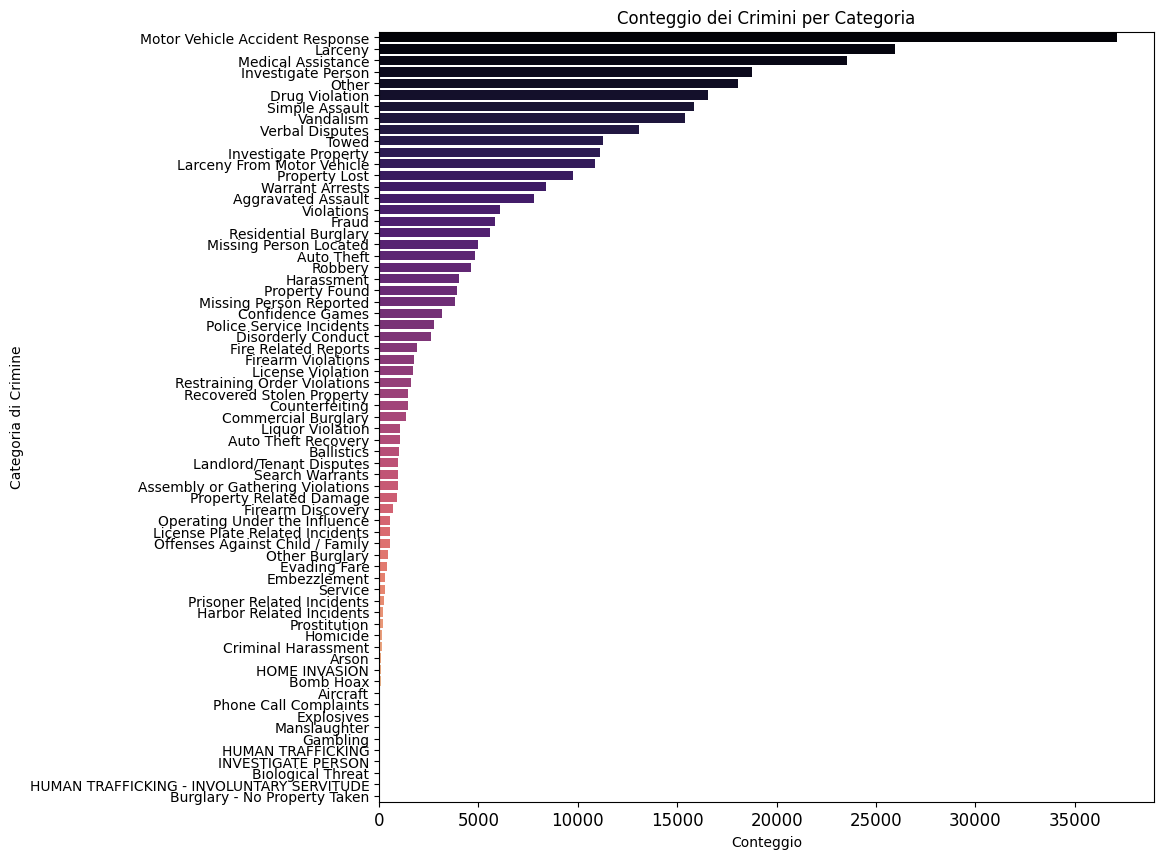

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creazione della tabella pivot per il conteggio dei crimini per categoria
crime_counts = data['OFFENSE_CODE_GROUP'].value_counts()

# Crea il grafico a barre orizzontale
plt.figure(figsize=(10, 10))  # Aumenta le dimensioni del grafico per far spazio alle etichette
sns.barplot(x=crime_counts.values, y=crime_counts.index, palette='magma')

# Imposta la dimensione del testo per le etichette orizzontali
plt.xticks(fontsize=12)

plt.title('Conteggio dei Crimini per Categoria')
plt.xlabel('Conteggio')
plt.ylabel('Categoria di Crimine')
plt.show()




**B.Categorizzazione dei Crimini secondo UCR L'UCR divide i crimini in due categorie principali: Part One (crimini gravi) e Part Two (crimini meno gravi).**

<ipython-input-19-dd8eb435cf4d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ucr_counts.index, y=ucr_counts.values, palette='viridis')


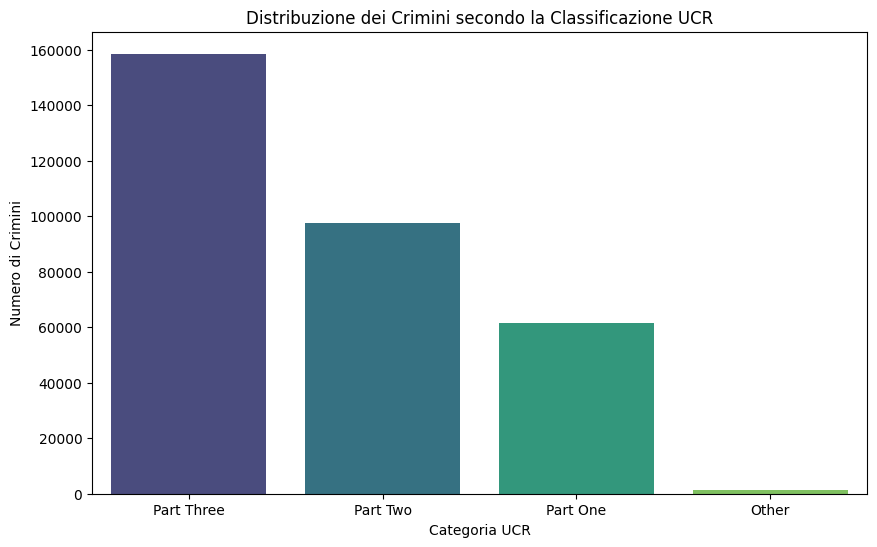

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteggio dei crimini per categoria UCR
ucr_counts = data['UCR_PART'].value_counts()

# Creazione del grafico a barre per categorie UCR
plt.figure(figsize=(10, 6))
sns.barplot(x=ucr_counts.index, y=ucr_counts.values, palette='viridis')
plt.title('Distribuzione dei Crimini secondo la Classificazione UCR')
plt.xlabel('Categoria UCR')
plt.ylabel('Numero di Crimini')
plt.show()

**C. Analisi della Distribuzione della Gravità dei Crimini per Distretto Per vedere come la gravità dei crimini si distribuisce geograficamente**

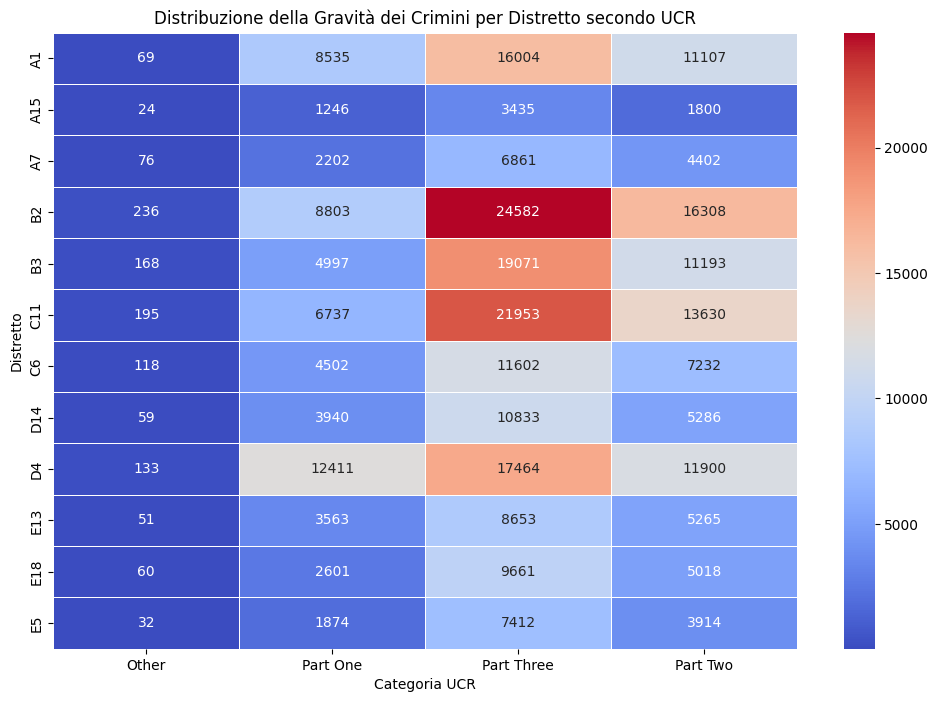

In [ ]:
import pandas as pd

# Creazione di una tabella pivot con i conteggi dei crimini gravi e meno gravi per distretto
ucr_pivot_table = pd.pivot_table(data, values='INCIDENT_NUMBER', index='DISTRICT', columns='UCR_PART', aggfunc='count', fill_value=0)

# Creazione della mappa di calore
plt.figure(figsize=(12, 8))
sns.heatmap(ucr_pivot_table, annot=True, fmt="d", cmap='coolwarm', linewidths=.5)
plt.title('Distribuzione della Gravità dei Crimini per Distretto secondo UCR')
plt.xlabel('Categoria UCR')
plt.ylabel('Distretto')
plt.show()

**D. Analisi Temporale della Gravità dei Crimini Per analizzare come la gravità dei crimini varia nel tempo, possiamo creare un grafico di serie temporali che mostra l'evoluzione mensile o annuale dei crimini gravi e meno gravi.**

<Figure size 1400x700 with 0 Axes>

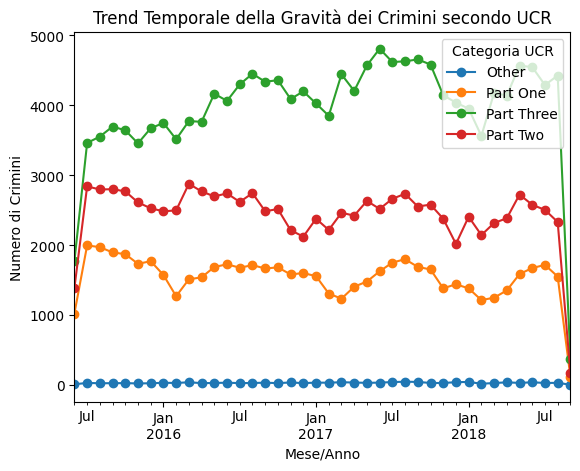

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conversione della data in formato datetime se non già fatto
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

# Creazione di una nuova colonna per l'anno e il mese
data['Year_Month'] = data['OCCURRED_ON_DATE'].dt.to_period('M')

# Creazione di una tabella pivot mensile
monthly_ucr = pd.pivot_table(data, values='INCIDENT_NUMBER', index='Year_Month', columns='UCR_PART', aggfunc='count')

# Creazione del grafico di serie temporali
plt.figure(figsize=(14, 7))
monthly_ucr.plot(kind='line', marker='o')
plt.title('Trend Temporale della Gravità dei Crimini secondo UCR')
plt.xlabel('Mese/Anno')
plt.ylabel('Numero di Crimini')
plt.legend(title='Categoria UCR')
plt.show()

**E.  mappa interattiva che mostra la distribuzione dei crimini per distretto, inclusi i conteggi dei crimini per ogni categoria UCR**

In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Assicurati di avere le informazioni sui distretti, latitudine e longitudine
data.dropna(subset=['DISTRICT', 'Lat', 'Long'], inplace=True)

# Preparare i dati: calcolare il conteggio dei crimini per categoria UCR in ogni distretto
# e calcolare la posizione media per ogni distretto
district_data = data.groupby('DISTRICT')[['Lat', 'Long']].mean()

# Aggiungere i conteggi dei crimini per ogni categoria UCR in ogni distretto
ucr_parts = ['Part One', 'Part Two', 'Part Three', 'Other']
for part in ucr_parts:
    district_data[part] = data[data['UCR_PART'] == part].groupby('DISTRICT').size()

# Creazione della mappa
map_districts = folium.Map(location=[data['Lat'].mean(), data['Long'].mean()], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map_districts)

# Aggiunta dei markers per ogni distretto
for district, row in district_data.iterrows():
    popup_text = f"District: {district}<br>"
    popup_text += '<br>'.join(f"{part}: {row[part]}" for part in ucr_parts)
    folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Salva la mappa in un file HTML
map_districts.save('/mnt/data/crime_by_district.html')

# Visualizza la mappa (questo funzionerà in Jupyter Notebook/Lab)
map_districts
